In [109]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from random import randint

In [66]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [115]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [118]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2634 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9868


In [134]:
y_predict = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


showing number 9 above:



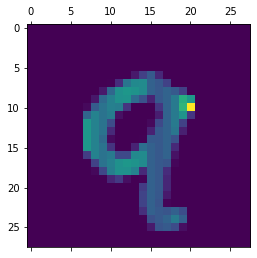

In [148]:
index = randint(0, len(x_test))

plt.matshow(x_test[index])
print(f'showing number {y_test[index]} above:\n')

In [149]:
print(f'the predicted value was {np.argmax(y_predict[index])}')

the predicted value was 9


In [151]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9748


[0.0870341807603836, 0.9747999906539917]

In [140]:
y_predict_labels = [np.argmax(i) for i in y_predict]
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

Text(69.0, 0.5, 'Real values')

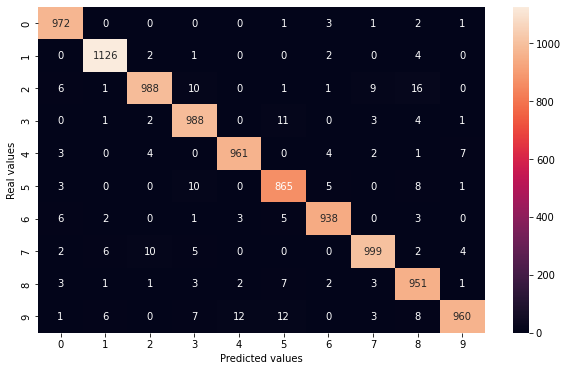

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')

plt.xlabel('Predicted values')
plt.ylabel('Real values')